In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from tabulate import tabulate
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset= pd.read_csv('dataset.csv')

In [3]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


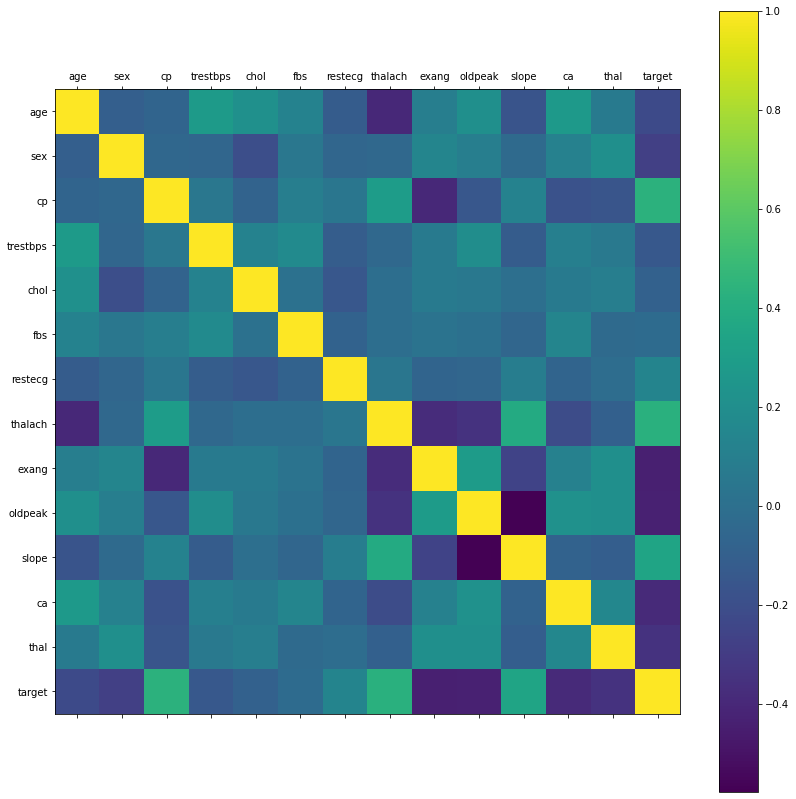

In [7]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

<AxesSubplot:>

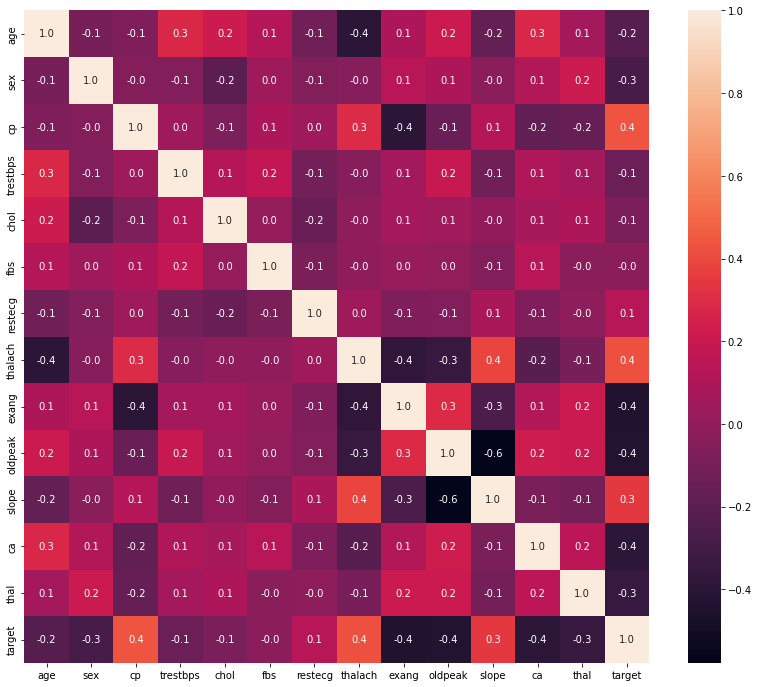

In [8]:
## Correlation Matrix 
plt.figure(figsize=(14,12))
sns.heatmap(dataset.corr(),annot=True, fmt = ".1f")

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

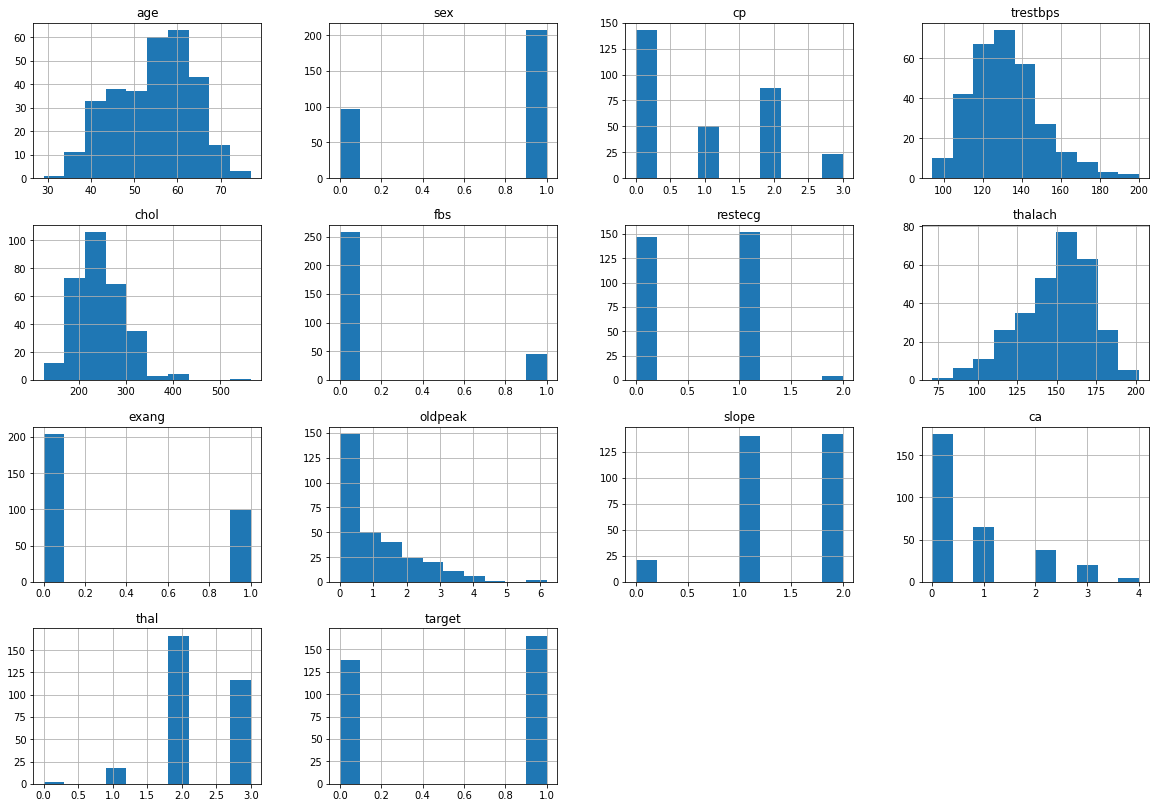

In [9]:
rcParams['figure.figsize'] = 20, 14
dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

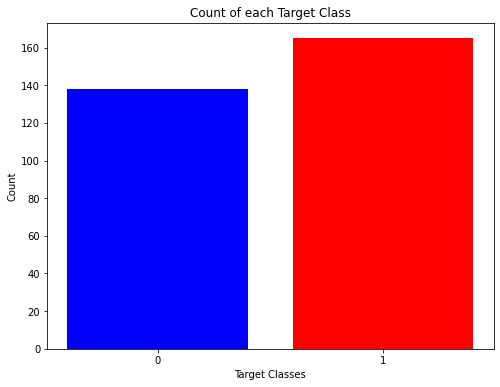

In [10]:
## Graphical Representation Of Outcomes
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [11]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [12]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [13]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =  42)

In [14]:
##DATA MODELLING

In [15]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
## Evaluating the model
KNN1 = knn.score(X_test,y_test)
print(KNN1)

0.86


In [16]:
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
## Evaluating the model
SVM1 = svm.score(X_test,y_test)
print(SVM1)

0.89


In [17]:
## Build an model (Gaussian Naive Bayes)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
## Evaluating the model
GNB1 = gnb.score(X_test,y_test)
print(GNB1)

0.82


In [18]:
##Tabular Representation of Data
d = [["KNN",KNN1],["SVM",SVM1],["GNB",GNB1]]
print(tabulate(d, headers = ["Name","Accuracy"]))

Name      Accuracy
------  ----------
KNN           0.86
SVM           0.89
GNB           0.82


(array([0, 1, 2]),
 [Text(0, 0, 'K Nearest Neighbours'),
  Text(1, 0, 'Support Vector Machine'),
  Text(2, 0, 'Gaussian Naive Bayes')])

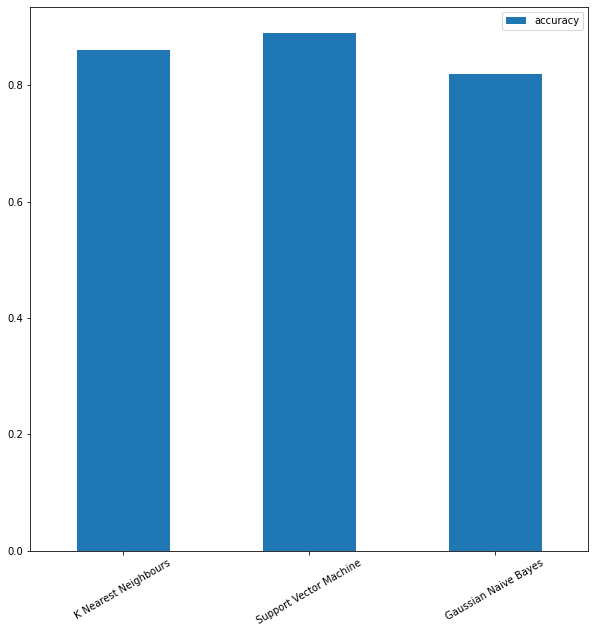

In [20]:
##MODEL PERFORMANCE COMPARISON
model_compare = pd.DataFrame({
"K Nearest Neighbours":KNN1,"Support Vector Machine":SVM1, "Gaussian Naive Bayes":GNB1},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(10,10));
plt.xticks(rotation=30, horizontalalignment="center")

In [21]:
##HYPERPARAMETER TUNING TO INCREASE ACCURACY

In [22]:
##KNN

In [23]:
knn_scores =[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors =k )
    score= cross_val_score(knn, X,y, cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'KNN classifier scores for differnt K-values')

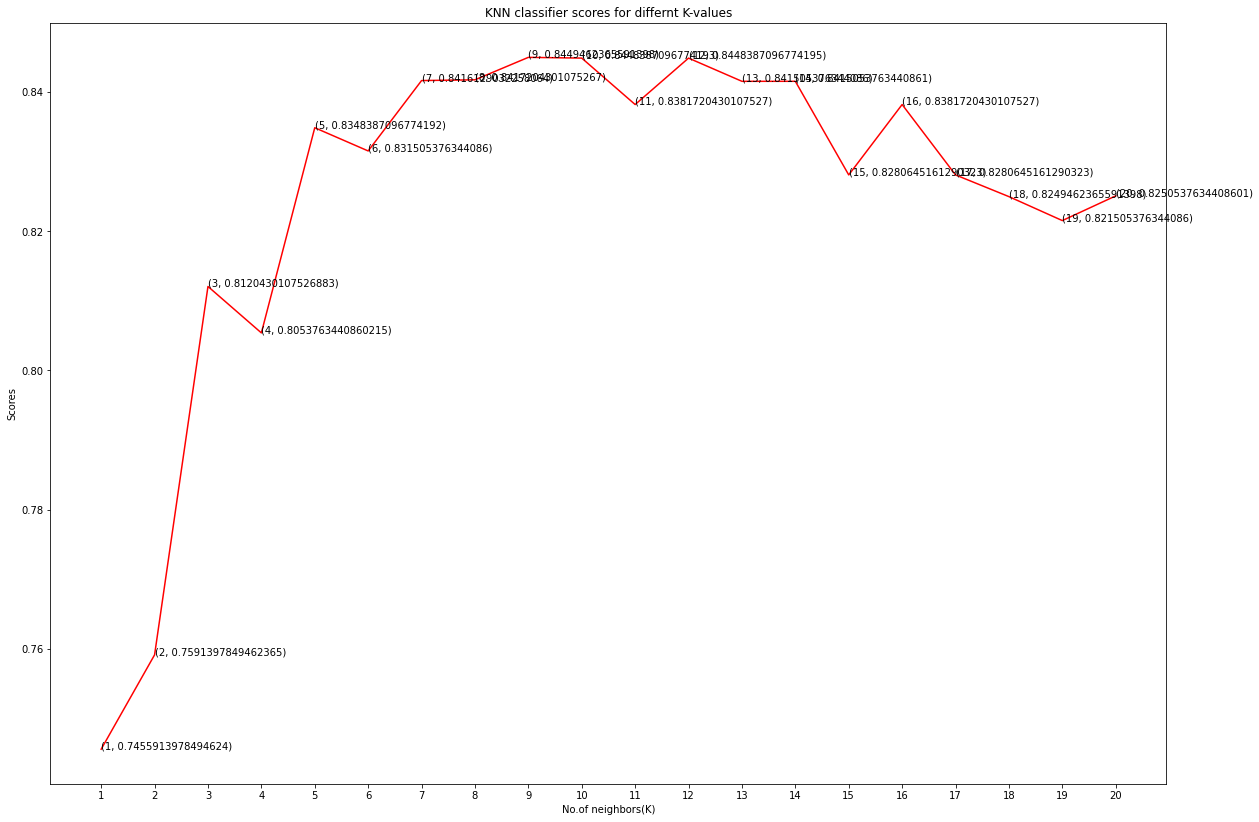

In [24]:
rcParams['figure.figsize'] = 20, 14

plt.plot([k for k in range(1,21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('No.of neighbors(K)')
plt.ylabel('Scores')
plt.title('KNN classifier scores for differnt K-values')

In [25]:
knn_scores.sort()
print(knn_scores)

[0.7455913978494624, 0.7591397849462365, 0.8053763440860215, 0.8120430107526883, 0.821505376344086, 0.8249462365591398, 0.8250537634408601, 0.8280645161290323, 0.8280645161290323, 0.831505376344086, 0.8348387096774192, 0.8381720430107527, 0.8381720430107527, 0.841505376344086, 0.8415053763440861, 0.8416129032258064, 0.8417204301075267, 0.8448387096774193, 0.8448387096774195, 0.8449462365591398]


In [26]:
##SVC

In [27]:
kernels = ['linear', 'rbf', 'poly']
svc_scores=[]
for k in kernels:
    SVM=SVC(kernel=k)
    score=cross_val_score(SVM,X,y,cv=10)
    svc_scores.append(score.mean())

In [28]:
print("'linear',           'rbf',              'poly'")
print(svc_scores)

'linear',           'rbf',              'poly'
[0.8313978494623656, 0.8379569892473118, 0.844516129032258]


In [29]:
##GNB

In [30]:
gnb_scores= []
var_smoothing = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
for i in var_smoothing:
    gnb=GaussianNB(priors=None, var_smoothing=i)
    score= cross_val_score(gnb, X,y, cv=10)
    gnb_scores.append(score.mean())
print(gnb_scores)
for i in var_smoothing:
    print(type(i))

[0.8418279569892473, 0.828494623655914, 0.8184946236559141, 0.8084946236559141, 0.8051612903225808, 0.8051612903225808, 0.8018279569892475, 0.8018279569892475, 0.8018279569892475, 0.7952688172043011, 0.7820430107526881, 0.7787096774193548, 0.775483870967742, 0.775483870967742, 0.772258064516129]
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


Text(0.5, 1.0, 'GNB classifier scores for differnt var_smoothing values')

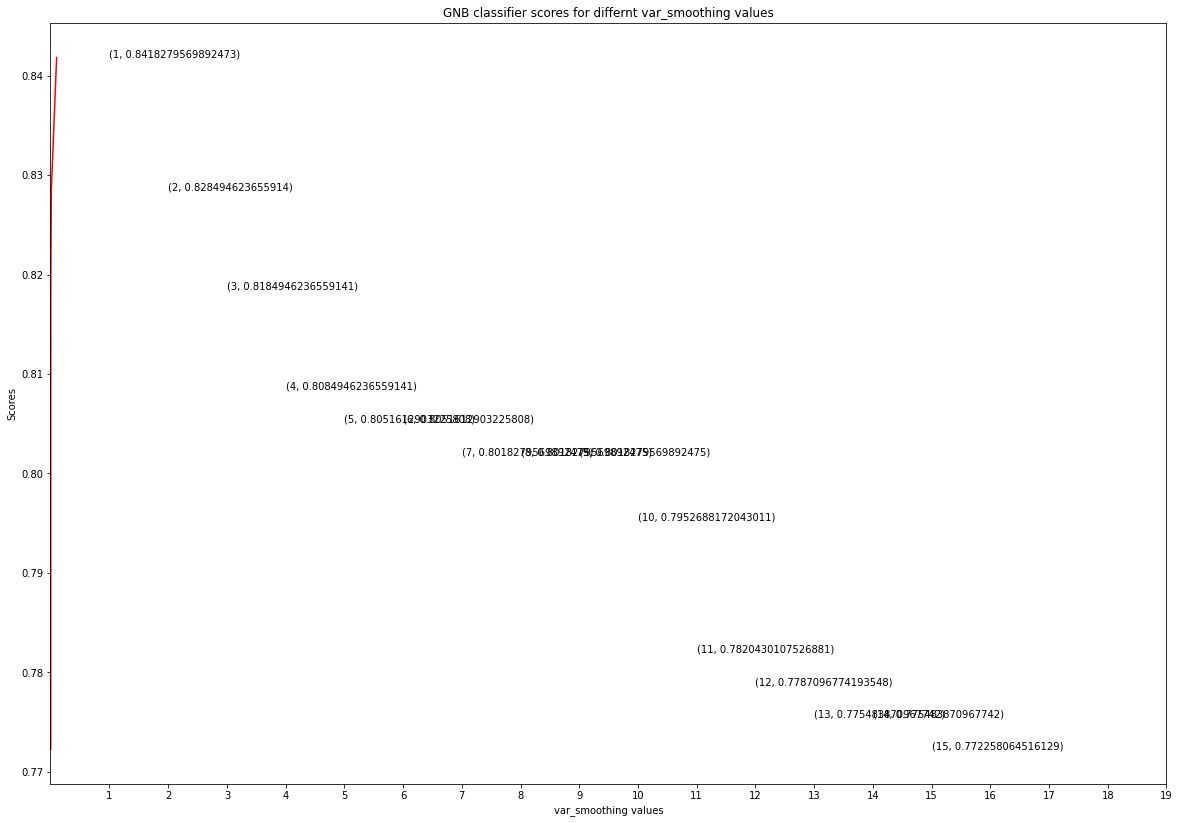

In [31]:
plt.plot([k for k in var_smoothing], gnb_scores, color = 'red')
for i in range(len(var_smoothing)):
    plt.text(i+1, gnb_scores[i], (i+1, gnb_scores[i]))
plt.xticks([i for i in range (1,20)])
plt.xlabel('var_smoothing values')
plt.ylabel('Scores')
plt.title('GNB classifier scores for differnt var_smoothing values')

In [32]:
##DATA MODELLING AFTER HYPERTUNING TO INCREASE ACCURACY

In [33]:
## Build an model (KNN)
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
## Evaluating the model
KNN = knn.score(X_test,y_test)
cm1 = confusion_matrix(y_test,y_pred)
print(KNN)

0.86


In [34]:
## Build an model (Support Vector Machine)
svm = SVC(kernel='poly')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
## Evaluating the model
SVM = svm.score(X_test,y_test)
cm2 = confusion_matrix(y_test,y_pred)
print(SVM)

0.84


In [35]:
## Build an model (Gaussian Naive Bayes)
gnb = GaussianNB(priors=None, var_smoothing=1e-01)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
## Evaluating the model
GNB = gnb.score(X_test,y_test)
cm3 = confusion_matrix(y_test,y_pred)
print(GNB)

0.87


In [36]:
##Tabular Representation of Data
d = [["KNN",KNN,cm1],["SVM",SVM,cm2],["GNB",GNB,cm3]]
print(tabulate(d, headers = ["Name","Accuracy","Confusion Matrix"]))

Name      Accuracy  Confusion Matrix
------  ----------  ------------------
KNN           0.86  [[36  6]
                     [ 8 50]]
SVM           0.84  [[35  7]
                     [ 9 49]]
GNB           0.87  [[37  5]
                     [ 8 50]]


(array([0, 1, 2]),
 [Text(0, 0, 'K Nearest Neighbours'),
  Text(1, 0, 'Support Vector Machine'),
  Text(2, 0, 'Gaussian Naive Bayes')])

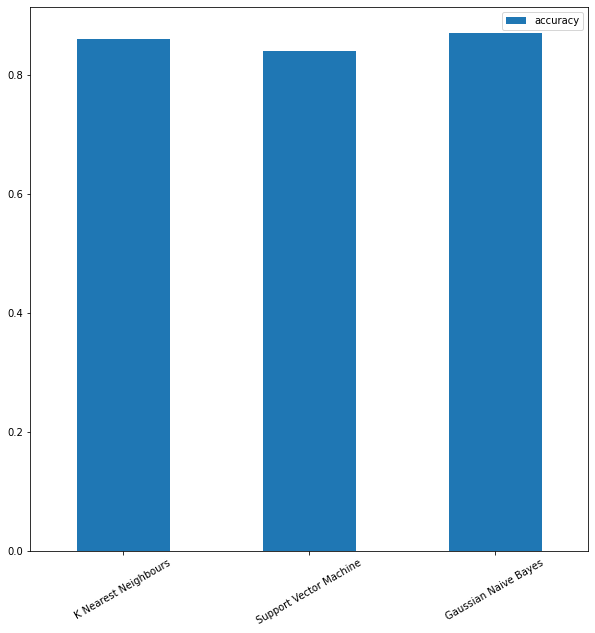

In [37]:
##MODEL PERFORMANCE COMPARISON
model_compare = pd.DataFrame({
"K Nearest Neighbours":KNN,"Support Vector Machine":SVM, "Gaussian Naive Bayes":GNB},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(10,10));
plt.xticks(rotation=30, horizontalalignment="center")

[[36  6]
 [ 8 50]]


Text(0.5, 1.0, 'confusion matrix')

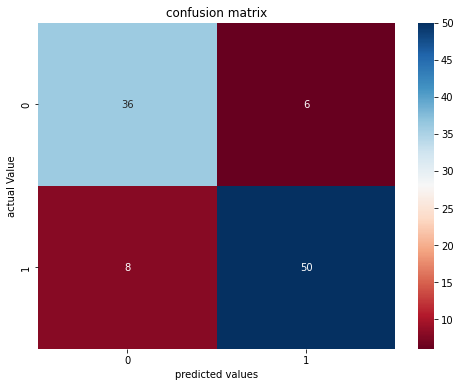

In [38]:
##CONFUSION MATRIX
rcParams['figure.figsize'] = 8,6
print(cm1)
Window5 = plt.figure(5)
sns.heatmap(data=cm1, annot = True, cmap='RdBu')
plt.ylabel("actual Value")
plt.xlabel("predicted values")
plt.title("confusion matrix")

[[35  7]
 [ 9 49]]


Text(0.5, 1.0, 'confusion matrix')

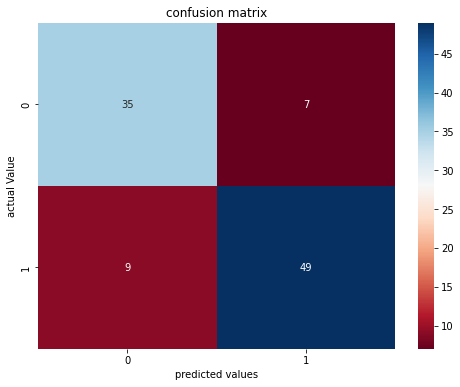

In [39]:
print(cm2)
Window5 = plt.figure(5)
sns.heatmap(data=cm2, annot = True, cmap='RdBu')
plt.ylabel("actual Value")
plt.xlabel("predicted values")
plt.title("confusion matrix")

[[37  5]
 [ 8 50]]


Text(0.5, 1.0, 'confusion matrix')

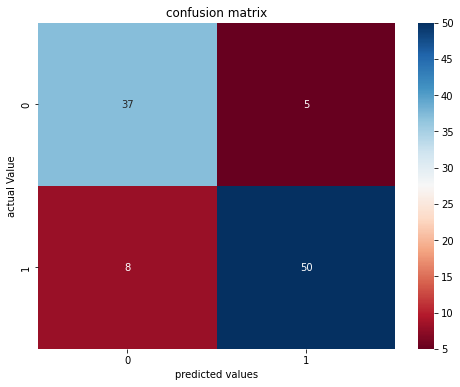

In [40]:
print(cm3)
Window5 = plt.figure(5)
sns.heatmap(data=cm3, annot = True, cmap='RdBu')
plt.ylabel("actual Value")
plt.xlabel("predicted values")
plt.title("confusion matrix")

In [41]:
##Indexes of Confusion Matrix

##KNN
TP1 = cm1[0][0]
FP1 = cm1[0][1]
FN1 = cm1[1][0]
TN1 = cm1[1][1]

##SVM
TP2 = cm2[0][0]
FP2 = cm2[0][1]
FN2 = cm2[1][0]
TN2 = cm2[1][1]

##GNB
TP3 = cm3[0][0]
FP3 = cm3[0][1]
FN3 = cm3[1][0]
TN3 = cm3[1][1]

##Precision
P1 =  TP1/(TP1 + FP1)
P2 =  TP2/(TP2 + FP2)
P3 =  TP3/(TP3 + FP3)

print("KNN Precision= ", P1)
print("SVM Precision= ", P2)
print("GNB Precision= ", P3)

KNN Precision=  0.8571428571428571
SVM Precision=  0.8333333333333334
GNB Precision=  0.8809523809523809


In [42]:
## Recall
R1 =  TP1/(TP1 + FN1)
R2 =  TP2/(TP2 + FN2)
R3 =  TP3/(TP3 + FN3)
print("KNN Recall= ", R1)
print("SVM Recall= ", R2)
print("GNB Recall= ", R3)

KNN Recall=  0.8181818181818182
SVM Recall=  0.7954545454545454
GNB Recall=  0.8222222222222222


In [43]:
## Specifcity
S1 = TN1/(TN1+FP1)
S2 = TN2/(TN2+FP2)
S3 = TN3/(TN3+FP3)

print("KNN Specificity= ", S1)
print("SVM Specificity= ", S2)
print("GNB Specificity= ", S3)

KNN Specificity=  0.8928571428571429
SVM Specificity=  0.875
GNB Specificity=  0.9090909090909091


In [44]:
## Accuracy
A1 = (TP1+TN1)/(TP1+TN1+FP1+FN1)
A2 = (TP2+TN2)/(TP2+TN2+FP2+FN2)
A3 = (TP3+TN3)/(TP3+TN3+FP3+FN3)

print("KNN Accuracy= ", A1)
print("SVM Accuracy= ", A2)
print("GNB Accuracy= ", A3)

KNN Accuracy=  0.86
SVM Accuracy=  0.84
GNB Accuracy=  0.87


In [45]:
d = [["KNN",P1,R1,S1,A1],["SVM",P2,R2,S2,A2],["GNB",P3,R3,S3,A3]] 
print(tabulate(d, headers = ["Name","Precision","Recall","Specificity","Accuracy"]))

Name      Precision    Recall    Specificity    Accuracy
------  -----------  --------  -------------  ----------
KNN        0.857143  0.818182       0.892857        0.86
SVM        0.833333  0.795455       0.875           0.84
GNB        0.880952  0.822222       0.909091        0.87


(array([0, 1, 2]),
 [Text(0, 0, 'K Nearest Neighbours'),
  Text(1, 0, 'Support Vector Machine'),
  Text(2, 0, 'Naive Bayes')])

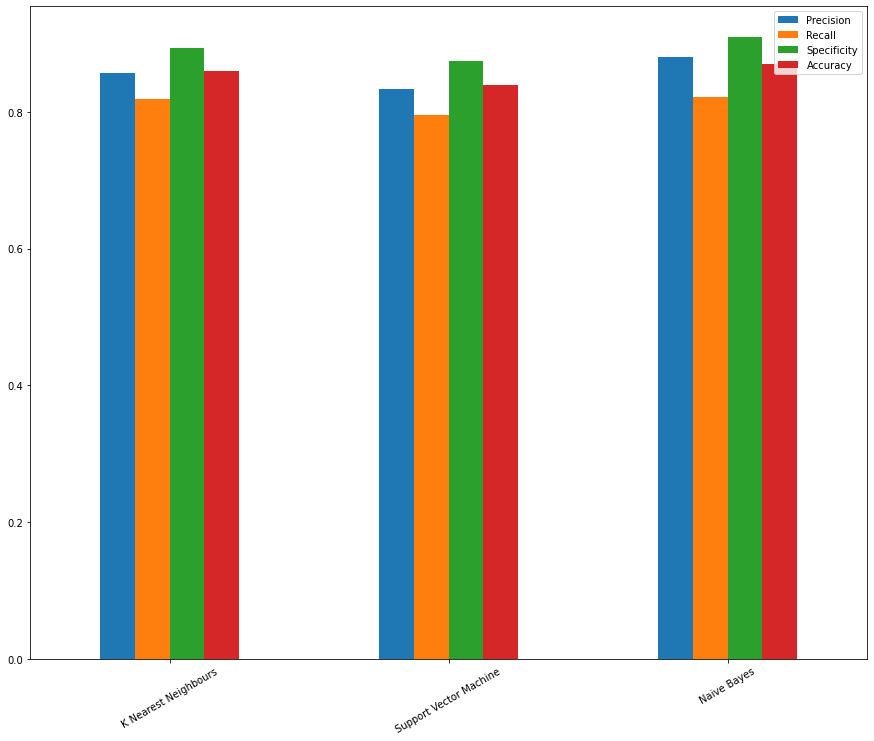

In [46]:
model_compare = pd.DataFrame({
"K Nearest Neighbours": [P1,R1,S1,A1],
"Support Vector Machine": [P2,R2,S2,A2],
"Naive Bayes": [P3,R3,S3,A3]},
index=["Precision", "Recall", "Specificity","Accuracy"])
model_compare.T.plot.bar(figsize=(15,12));
plt.xticks(rotation=30, horizontalalignment="center")

In [47]:
##CROSS VALIDATION FOR 5 cv

In [48]:
K_1 = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
print(K_1)

0.825136612021858


In [49]:
S_1 = cross_val_score(svm, X, y, cv=5,scoring='accuracy').mean()
print(S_1)

0.8414207650273223


In [50]:
G_1 = cross_val_score(gnb, X, y, cv=5,scoring='accuracy').mean()
print(G_1)

0.844808743169399


In [51]:
print("Cross Val. for 5 folds ")
d = [["KNN",K_1],["SVM",S_1],["GNB",G_1]]
print(tabulate(d, headers = ["Name","Accuracy"]))

Cross Val. for 5 folds 
Name      Accuracy
------  ----------
KNN       0.825137
SVM       0.841421
GNB       0.844809


(array([0, 1, 2]),
 [Text(0, 0, 'K Nearest Neighbours'),
  Text(1, 0, 'Support Vector Machine'),
  Text(2, 0, 'Naive Bayes')])

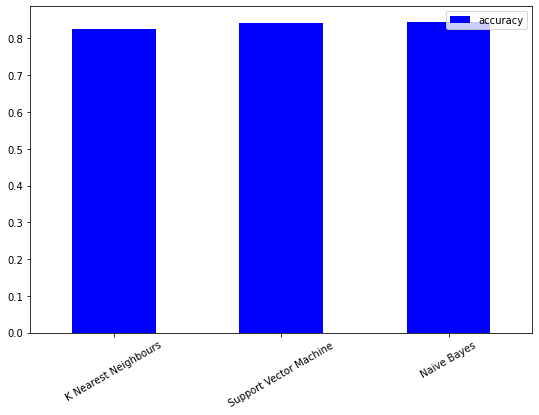

In [52]:
model_compare = pd.DataFrame({
"K Nearest Neighbours":K_1,"Support Vector Machine":S_1, "Naive Bayes":G_1},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(9,6),color="blue");
plt.xticks(rotation=30, horizontalalignment="center")

In [53]:
##CROSS VALIDATION FOR 10 cv

In [54]:
K_2 = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
print(K_1)

0.825136612021858


In [55]:
S_2 = cross_val_score(svm, X, y, cv=10,scoring='accuracy').mean()
print(S_1)

0.8414207650273223


In [56]:
G_2 = cross_val_score(gnb, X, y, cv=10,scoring='accuracy').mean()
print(G_1)

0.844808743169399


In [57]:
print("Cross Val. for 10 folds ")
d = [["KNN",K_2],["SVM",S_2],["GNB",G_2]]
print(tabulate(d, headers = ["Name","Accuracy"]))

Cross Val. for 10 folds 
Name      Accuracy
------  ----------
KNN       0.844946
SVM       0.844516
GNB       0.841828


(array([0, 1, 2]),
 [Text(0, 0, 'K Nearest Neighbours'),
  Text(1, 0, 'Support Vector Machine'),
  Text(2, 0, 'Naive Bayes')])

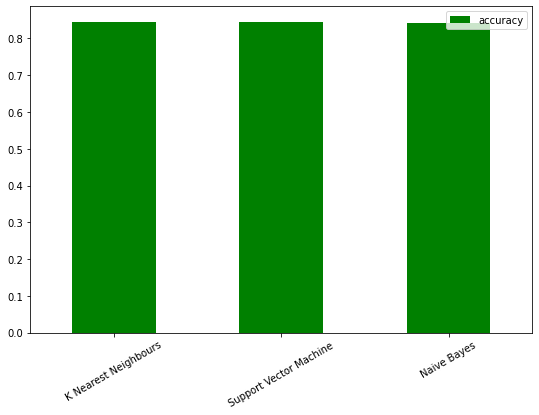

In [58]:
model_compare = pd.DataFrame({
"K Nearest Neighbours":K_2,"Support Vector Machine":S_2, "Naive Bayes":G_2},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(9,6),color="green");
plt.xticks(rotation=30, horizontalalignment="center")

In [59]:
d = [["KNN",A1,KNN1,K_1,K_2],["SVM",A2,SVM1,S_1,S_2],["GNB",A3,GNB1,G_1,G_2]] 
print(tabulate(d, headers = ["Name","Accuracy with chosen parameter", "Accuracy by TrainTest","5-fold CV ","10-fold CV"]))

Name      Accuracy with chosen parameter    Accuracy by TrainTest    5-fold CV     10-fold CV
------  --------------------------------  -----------------------  ------------  ------------
KNN                                 0.86                     0.86      0.825137      0.844946
SVM                                 0.84                     0.89      0.841421      0.844516
GNB                                 0.87                     0.82      0.844809      0.841828


(array([0, 1, 2]),
 [Text(0, 0, 'K Nearest Neighbours'),
  Text(1, 0, 'Support Vector Machine'),
  Text(2, 0, 'Naive Bayes')])

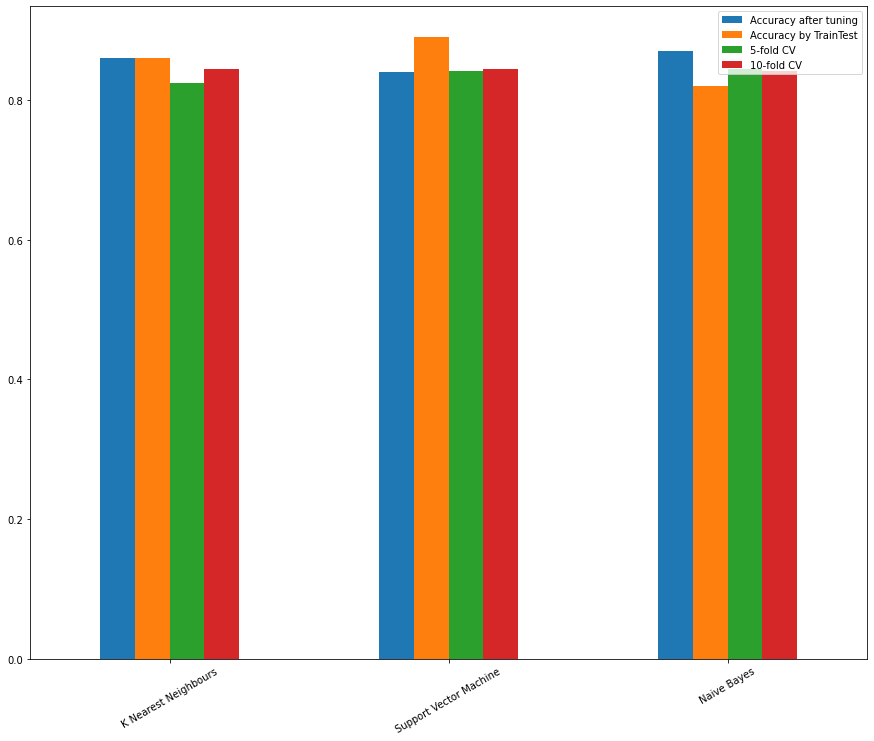

In [62]:
model_compare = pd.DataFrame({
"K Nearest Neighbours": [A1,KNN1,K_1,K_2],
"Support Vector Machine": [A2,SVM1,S_1,S_2],
"Naive Bayes": [A3,GNB1,G_1,G_2]},
index=["Accuracy after tuning", "Accuracy by TrainTest","5-fold CV ","10-fold CV"])
model_compare.T.plot.bar(figsize=(15,12));
plt.xticks(rotation=30, horizontalalignment="center")